In [1]:
import os
import glob
import LatLon 
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)

# plot
%matplotlib inline
import pylab
import seaborn as sns
sns.set_style("whitegrid")
from pysurvey.plot import setup, legend, icolorbar, density

# date
from dateutil import parser
from matplotlib.dates import date2num

# database
import dataset
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database

import sompy as SOM

In [2]:
before = pd.DataFrame.from_csv('/Users/ajmendez/tmp/flight/flight_before.csv')
after = pd.DataFrame.from_csv('/Users/ajmendez/tmp/flight/flight_after.csv')

In [3]:
clean_tags = ['flight', 'date', 'time', 'weekday', 'normtime', #'datenum', 
#               'alt', 'distance', 'heading_deg', 'heading', 'x', 'y'
             ]
input_tags = ['lat', 'lon', 'alt', 'hour', 'flightnum']
before_simple = before[before['alt'] < 20000].drop(clean_tags, axis=1)
after_simple = after[after['alt'] < 20000].drop(clean_tags, axis=1)

before_simple

,alt,lat,lon,flightnum,datenum,hour,heading_deg,distance,heading,x,y
555452,19975,39.90788,-76.57513,2804,4.083520,2.004485,3.696297,64.091509,0.064513,-42.303614,48.146918
555453,19975,39.90756,-76.57704,2804,4.083526,2.004627,3.552561,64.045640,0.062004,-42.393904,48.006259
...,...,...,...,...,...,...,...,...,...,...,...
870159,16175,39.10835,-77.00293,2065,5.926931,22.246340,232.990672,41.103616,-2.216731,-5.713891,-40.704529
870160,16225,39.10779,-77.00024,2065,5.926944,22.246651,232.724426,40.956478,-2.221378,-5.504905,-40.584839


In [4]:
somdata = np.zeros( (len(before_simple), len(input_tags)) )
for i, tag in enumerate(input_tags):
    somdata[:,i] = before_simple[tag]

In [5]:
nz = 100
sm = SOM.SOM('sm', somdata, names=input_tags, 
             mapsize=(nz, nz), norm_method = 'var', initmethod='pca', neigh='Guassian')

In [6]:
sm.train(n_job=1, shared_memory='no',verbose='on')


initialization method = pca, initializing..

initialization done in 0.195000 seconds

rough training...
radius_ini: 13.000000 , radius_final: 3.250000, trainlen: 4

epoch: 1 ---> elapsed time:  9.294000, quantization error: 1.543030 

epoch: 2 ---> elapsed time:  8.939000, quantization error: 1.291100 

epoch: 3 ---> elapsed time:  8.893000, quantization error: 0.880868 

epoch: 4 ---> elapsed time:  9.130000, quantization error: 0.655456 


finetune training...
radius_ini: 3.250000 , radius_final: 1.000000, trainlen: 5

epoch: 1 ---> elapsed time:  9.301000, quantization error: 0.448378 

epoch: 2 ---> elapsed time:  8.616000, quantization error: 0.400222 

epoch: 3 ---> elapsed time:  9.217000, quantization error: 0.340749 

epoch: 4 ---> elapsed time:  9.512000, quantization error: 0.278955 

epoch: 5 ---> elapsed time:  9.679000, quantization error: 0.212927 

Total time elapsed: 104.610000 secodns
final quantization error: 0.212927

Total time elapsed: 104.611000 secodns
final qu

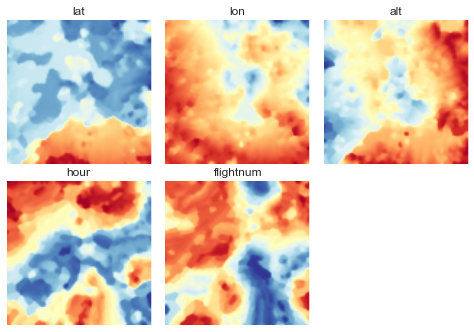

In [7]:
sm.view_map(text_size=12, COL_SiZe=3)

In [14]:
index = sm.ind_to_xy(sm.project_data(somdata))